## Abstract

This projects performs end-to-end image transformation using deep neural networks.
The architecture of the model is a 2D autoencoder, where the encoder and decoder are implemented using the ResNet18-like architecture.
The network model is implemented based on existing resources from the Internet.
Currently, there are many public repositories that implement 2D encoder-decoder architectures, I adopted the one from: ```https://github.com/julianstastny/VAE-ResNet18-PyTorch/blob/master/model.py.```
The loss function used to supervise the modeling training is the ```squared L2 norm```.

The performance of the current implementation is not ideal, because the transformed images are a bit blurry, but the targeted image
should be more sharp. I am planning to use ```L1 norm``` as the loss function in the next step.



## Getting Started

### Environment

- python 3.7
- pytorch 1.10.0
- opencv-python 4.6.0.66
- scikit-image 0.19.3
- matplotlib 3.5.3
- tqdm 4.64.1

### Setup

```shell script
pip3 install -r requirements.txt
```



## Loading dependencies 

In [1]:
import torch.nn as nn
import os
import cv2
from model import Autoencoder_2d
import torch
import numpy as np
import matplotlib.pyplot as plt
import random
from utils import handle_close, waitforbuttonpress

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-m2s_yljy because the default path (/home/micro-gesture/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## Specifying root folder of test data

In [2]:
dataroot = 'Test_dataset'

filenames = os.listdir(dataroot)

num_samples = len(filenames)


## Initializing model and load weight

In [3]:
model = Autoencoder_2d().cuda()
model.load_state_dict(torch.load('latest.pth'))

<All keys matched successfully>

## Testing and presenting results

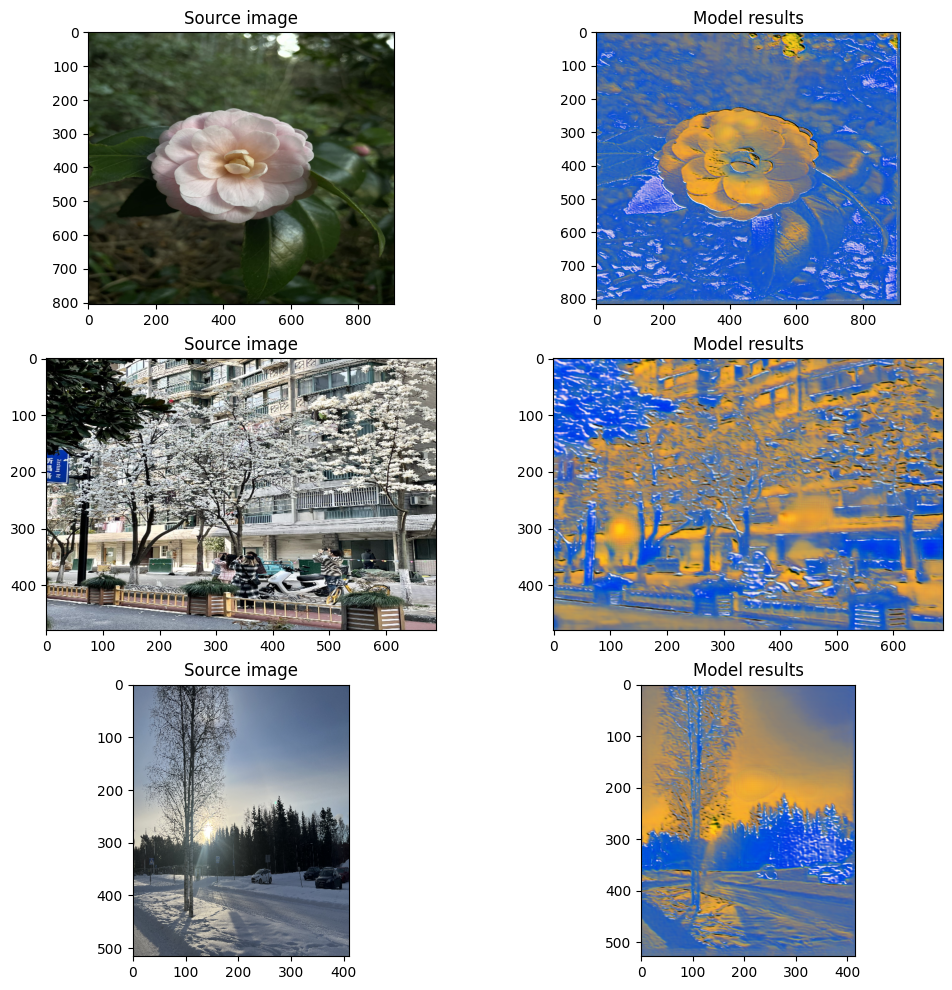

In [11]:
num_samples_toshow = 3

f, axarr = plt.subplots(num_samples_toshow, 2, figsize=(12,12))
f.canvas.mpl_connect('close_event', handle_close)

for i in range(num_samples_toshow):
    #Randomly choosing one image pair.
    ind = random.randint(0, num_samples-1)

    """
    Rlplacing your own image path here
    Rlplacing your own image path here
    """
    img_path_source = '{}/{}'.format(dataroot, filenames[ind])

    """
    Resize the image arbitrarily
    """
    h = random.randint(128, 1280) # up to 1280 to avoid OOM
    w = random.randint(128, 1280)  # up to 1280 to avoid OOM

    input = cv2.imread(img_path_source)
    input = cv2.resize(input, (w, h))

    input = cv2.cvtColor(input, cv2.COLOR_BGR2RGB)

    x = torch.from_numpy(input.transpose([2, 0, 1])).float().cuda()/255.0

    outputs = model(x.unsqueeze(0))

    """
    Visualizing results
    """
    axarr[i, 0].imshow(input)
    axarr[i, 1].imshow((outputs.cpu().detach().numpy()[0,...].transpose([1,2,0])[:,:,::-1]*255).astype('uint'))
    axarr[i, 0].set_title('Source image')
    axarr[i, 1].set_title('Model results')


plt.show()
